<a href="https://colab.research.google.com/github/het1752/machine-learning/blob/main/Water_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Water Quality Prediction

##Dataset Details:
link of Dataset : https://www.kaggle.com/code/rushabhfegade/water-quality-prediction/data

Water Quality Drinking water potability Context Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Content The water_potability.csv file contains water quality metrics for 3276 different water bodies.

pH value: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

Hardness: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

Solids (Total dissolved solids - TDS): Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

Chloramines: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

Sulfate: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

Conductivity: Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

Organic_carbon: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

Trihalomethanes: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

Turbidity: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

Potability: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv("/content/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


##Remove NaN value with it's Median Values

In [3]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
ph_median=data.ph.median()
ph_median

7.036752103833548

In [6]:
Sul_median=data.Sulfate.median()
Sul_median

333.073545745888

In [7]:
Tri_median=data.Trihalomethanes.median()
Tri_median

66.62248509808484

In [8]:
data['ph'].fillna(ph_median,inplace=True)

In [9]:
data['Sulfate'].fillna(Sul_median,inplace=True)

In [10]:
data['Trihalomethanes'].fillna(Tri_median,inplace=True)

In [11]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [12]:
data.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [13]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [14]:
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

In [15]:
data.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [16]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,333.073546,327.459760,16.140368,78.698446,2.309149,1


In [17]:
#potability 1 means Safe water
#potability 0 means not safe water

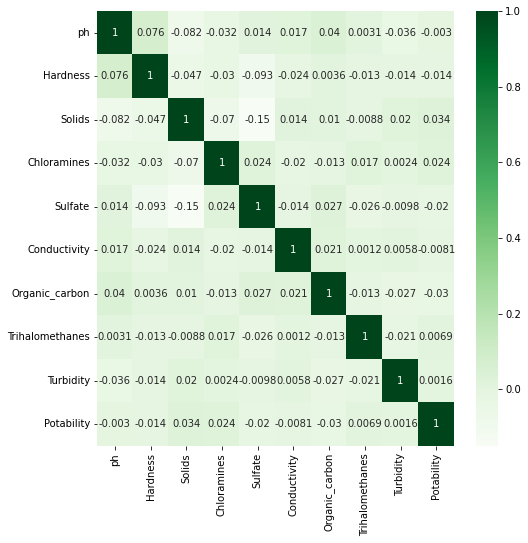

In [18]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True,cmap='Greens')

##Split dataset

In [19]:
x=data.drop('Potability',axis=1)
y=data.Potability

In [20]:
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
len(x_train),len(y_train),len(x_test),len(y_test)

(2620, 2620, 656, 656)

In [24]:
y_train.head()

233     0
831     0
2658    0
2495    0
2603    0
Name: Potability, dtype: int64

In [25]:
y_train.value_counts()

0    1586
1    1034
Name: Potability, dtype: int64

##Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [32]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)
pred_y1=model.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y1))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y1))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y1))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y1))

[[361  51]
 [158  86]]
Precision: 0.6277372262773723
recall: 0.3524590163934426
f1_score: 0.4514435695538058


In [35]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(x_train,y_train)
pred_y2=model2.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y2))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y2))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y2))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y2))

[[264 148]
 [125 119]]
Precision: 0.44569288389513106
recall: 0.48770491803278687
f1_score: 0.4657534246575342


In [36]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [37]:
#gausiian naive bias classifier
model3 = GaussianNB()
model3.fit(x_train,y_train)
pred_y3=model3.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y3))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y3))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y3))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y3))

[[360  52]
 [192  52]]
Precision: 0.5
recall: 0.21311475409836064
f1_score: 0.29885057471264365


In [38]:
#multinomial naive bias classifier
model4 = MultinomialNB()
model4.fit(x_train,y_train)
pred_y4=model4.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y4))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y4))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y4))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y4))

[[228 184]
 [133 111]]
Precision: 0.376271186440678
recall: 0.45491803278688525
f1_score: 0.41187384044526903
